In [46]:
library(transformeR)
library("visualizeR")
library(xtable)

quantity2clim <- function(quantity, what, ref.grid, backperm = NULL) {
  if(!is.null(backperm)){quantity <- quantity[backperm]}
  mat <- matrix(quantity, nrow = 1)  
  ref.grid$Data <- mat2Dto3Darray(mat, x = ref.grid$xyCoords$x , y = ref.grid$xyCoords$y)
  attr(ref.grid$Data, "climatology:fun") <- what
  return(ref.grid)
}


In [16]:
ruta <- '../3.Datos generados/dataframes/df_grid_5.Rdata'
df <- get(load(ruta))
ref.grid = get(load('../1.Upscaling/upscaling_ba/ba_grid_5.Rdata'))

In [12]:
archivosdf <- list.files(path = 'dataframes', pattern = "^df_grid_", full.names = TRUE)

In [44]:
grids <- c( '1', '1.5', '2', '2.5','3','4','5')
num_pixeles <- c()
num_pixeles_con_fireSeasson <- c()
media_mainFireStart <- c()
desv_mainFireStart <- c()
media_mainFireEnd <- c()
desv_mainFireEnd <- c()
num_bimodal <- c()
media_fireSeassonLength <- c()
desv_fireSeassonLength <- c()
media_SeassonalConcentration <- c()
desv_SeassonalConcentration <- c()
media_SeassonalTiming <- c()
desv_SeassonalTiming <- c()
for (archivo in archivosdf){
    df <- get(load(archivo))
    df_conFireSeasson <- df[df$FireSeassonOrNot != 0,]
    df_bimodales <- df_conFireSeasson[!is.na(df_conFireSeasson$secondary_fire_season_start), ] 
    
    num_pixeles <- c(num_pixeles, nrow(df))
    num_pixeles_con_fireSeasson <- c(num_pixeles_con_fireSeasson, nrow(df_conFireSeasson))
    media_mainFireStart <- c(media_mainFireStart, mean(df_conFireSeasson$main_fire_season_start))
    desv_mainFireStart <- c(desv_mainFireStart, sd(df_conFireSeasson$main_fire_season_start))
    media_mainFireEnd <- c(media_mainFireEnd, mean(df_conFireSeasson$main_fire_season_end))
    desv_mainFireEnd <- c(desv_mainFireEnd, sd(df_conFireSeasson$main_fire_season_end))
    media_fireSeassonLength <- c(media_fireSeassonLength, mean(df_conFireSeasson$fireSeassonLength))
    desv_fireSeassonLength <- c(desv_fireSeassonLength, sd(df_conFireSeasson$fireSeassonLength))
    media_SeassonalConcentration <- c(media_SeassonalConcentration, mean(df_conFireSeasson$SeassonalConcentration))
    desv_SeassonalConcentration <- c(desv_SeassonalConcentration, sd(df_conFireSeasson$SeassonalConcentration))
    media_SeassonalTiming <- c(media_SeassonalTiming, mean(df_conFireSeasson$SeassonalTiming))
    desv_SeassonalTiming <- c(desv_SeassonalTiming, sd(df_conFireSeasson$SeassonalTiming))
    num_bimodal <- c(num_bimodal, nrow(df_bimodales))
}
df_comparativaGrids <- data.frame(grids, num_pixeles, num_pixeles_con_fireSeasson, num_bimodal, media_mainFireStart, desv_mainFireStart, 
                                  media_mainFireEnd, desv_mainFireEnd,media_fireSeassonLength, desv_fireSeassonLength,
                                  media_SeassonalConcentration, desv_SeassonalConcentration, media_SeassonalTiming,desv_SeassonalTiming)
df_comparativaGrids

grids,num_pixeles,num_pixeles_con_fireSeasson,num_bimodal,media_mainFireStart,desv_mainFireStart,media_mainFireEnd,desv_mainFireEnd,media_fireSeassonLength,desv_fireSeassonLength,media_SeassonalConcentration,desv_SeassonalConcentration,media_SeassonalTiming,desv_SeassonalTiming
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,64800,12554,3545,3.269078,2.336522,5.481679,2.559268,4.006054,2.625327,0.7948313,0.1980768,0.2076506,0.9767753
1.5,28800,6203,1757,3.029018,2.260693,5.566339,2.581764,4.377076,2.688703,0.7771048,0.2013621,0.2079171,0.9845730
2,16200,3773,1058,2.896634,2.184594,5.654917,2.594283,4.572754,2.722947,0.7689168,0.2007847,0.2239234,0.9769992
2.5,10368,2576,725,2.756211,2.145476,5.700311,2.621246,4.810171,2.745812,0.7616565,0.2007686,0.2370876,0.9765506
3,7200,1895,522,2.672823,2.119596,5.757256,2.639191,4.921372,2.739411,0.7525482,0.2024948,0.2295837,0.9778347
4,4050,1166,325,2.542882,2.128361,5.796741,2.681494,5.135506,2.738470,0.7448893,0.2044589,0.2062748,0.9794490
5,2592,804,231,2.414179,1.972121,5.874378,2.746743,5.320896,2.791467,0.7459030,0.1932085,0.2104904,0.9765778


In [49]:
table <- xtable(df_comparativaGrids)
print(table, include.rownames = FALSE)

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Sat Sep  9 10:44:36 2023
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrrrrrrrrrr}
  \hline
grids & num\_pixeles & num\_pixeles\_con\_fireSeasson & num\_bimodal & media\_mainFireStart & desv\_mainFireStart & media\_mainFireEnd & desv\_mainFireEnd & media\_fireSeassonLength & desv\_fireSeassonLength & media\_SeassonalConcentration & desv\_SeassonalConcentration & media\_SeassonalTiming & desv\_SeassonalTiming \\ 
  \hline
1 & 64800 & 12554 & 3545 & 3.27 & 2.34 & 5.48 & 2.56 & 4.01 & 2.63 & 0.79 & 0.20 & 0.21 & 0.98 \\ 
  1.5 & 28800 & 6203 & 1757 & 3.03 & 2.26 & 5.57 & 2.58 & 4.38 & 2.69 & 0.78 & 0.20 & 0.21 & 0.98 \\ 
  2 & 16200 & 3773 & 1058 & 2.90 & 2.18 & 5.65 & 2.59 & 4.57 & 2.72 & 0.77 & 0.20 & 0.22 & 0.98 \\ 
  2.5 & 10368 & 2576 & 725 & 2.76 & 2.15 & 5.70 & 2.62 & 4.81 & 2.75 & 0.76 & 0.20 & 0.24 & 0.98 \\ 
  3 & 7200 & 1895 & 522 & 2.67 & 2.12 & 5.76 & 2.64 & 4.92 & 2.74 & 0.75 & 0.20 & 0.23 & 0.98 \\ 
  4 & 4050 

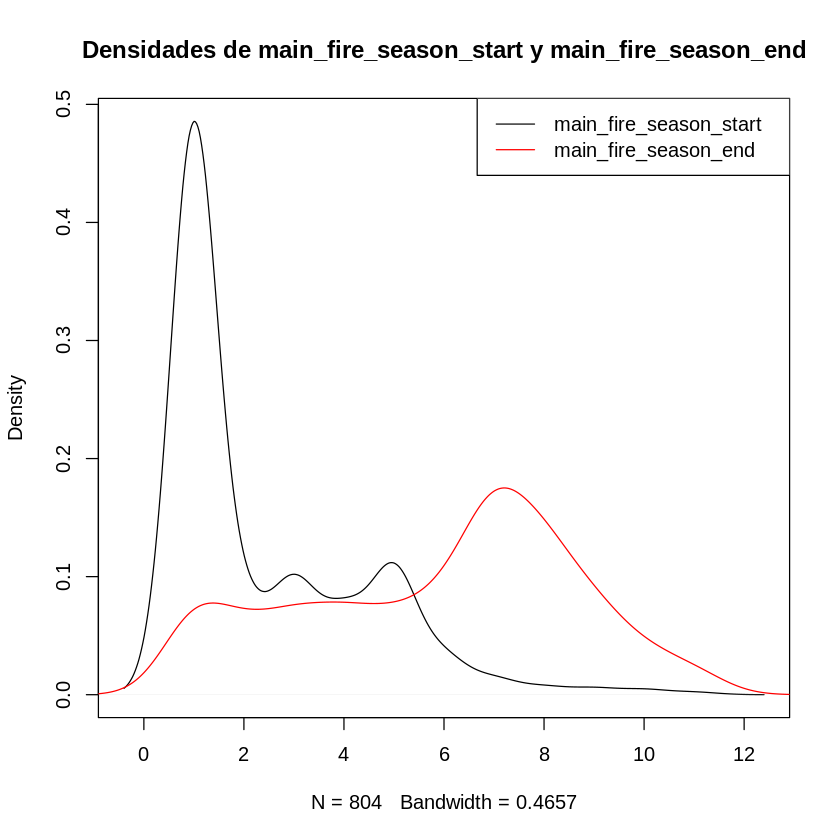

In [32]:
# Filtrar los datos
df_conFireSeasson <- df[df$FireSeassonOrNot != 0,]
mainFireSeassonStart <- df_conFireSeasson$main_fire_season_start
mainFireSeassonEnd <- df_conFireSeasson$main_fire_season_end

# Calcular las densidades
densityStart <- density(mainFireSeassonStart)
densityEnd <- density(mainFireSeassonEnd)

# Crear un gráfico vacío con la densidad de mainFireSeassonStart
plot(densityStart, main="Densidades de main_fire_season_start y main_fire_season_end")

# Agregar la densidad de mainFireSeassonEnd al gráfico existente
lines(densityEnd, col="red")

# Agregar una leyenda si es necesario
legend("topright", legend=c("main_fire_season_start", "main_fire_season_end"), col=c("black", "red"), lty=1)


In [28]:
df

coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
-177.5,-87.5,0,NA,NA,NA,NA,NA,0,0,0.000000000
-177.5,-82.5,0,NA,NA,NA,NA,NA,0,0,0.000000000
-177.5,-77.5,0,NA,NA,NA,NA,NA,0,0,0.000000000
-177.5,-72.5,0,NA,NA,NA,NA,NA,0,0,0.000000000
-177.5,-67.5,0,NA,NA,NA,NA,NA,0,0,0.000000000
-177.5,-62.5,0,NA,NA,NA,NA,NA,0,0,0.000000000
-177.5,-57.5,0,NA,NA,NA,NA,NA,0,0,0.000000000
-177.5,-52.5,0,NA,NA,NA,NA,NA,0,0,0.000000000
-177.5,-47.5,0,NA,NA,NA,NA,NA,0,0,0.000000000


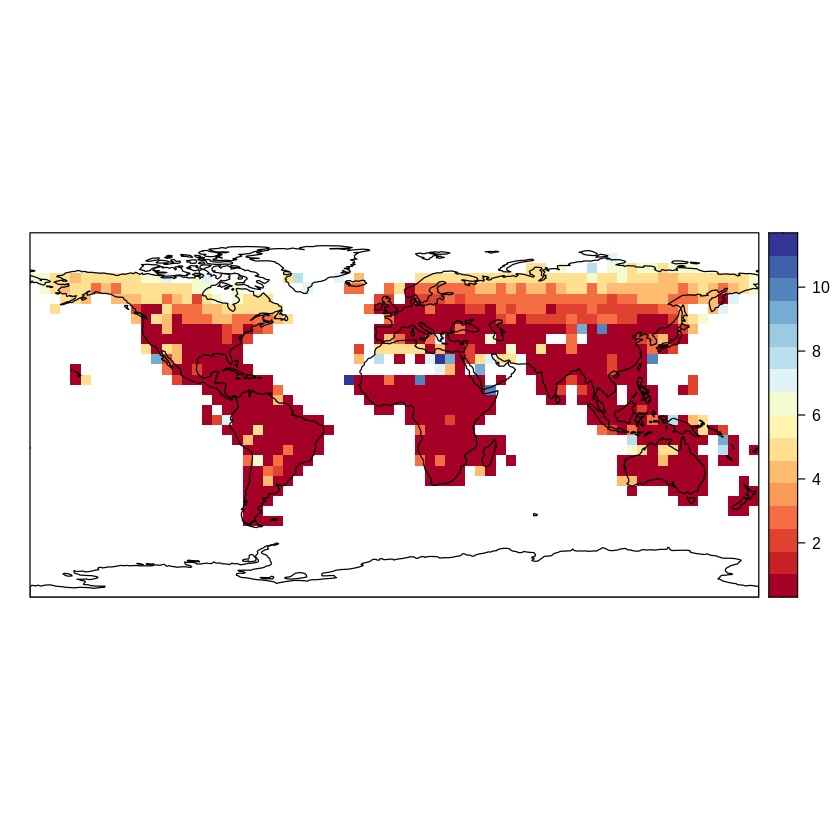

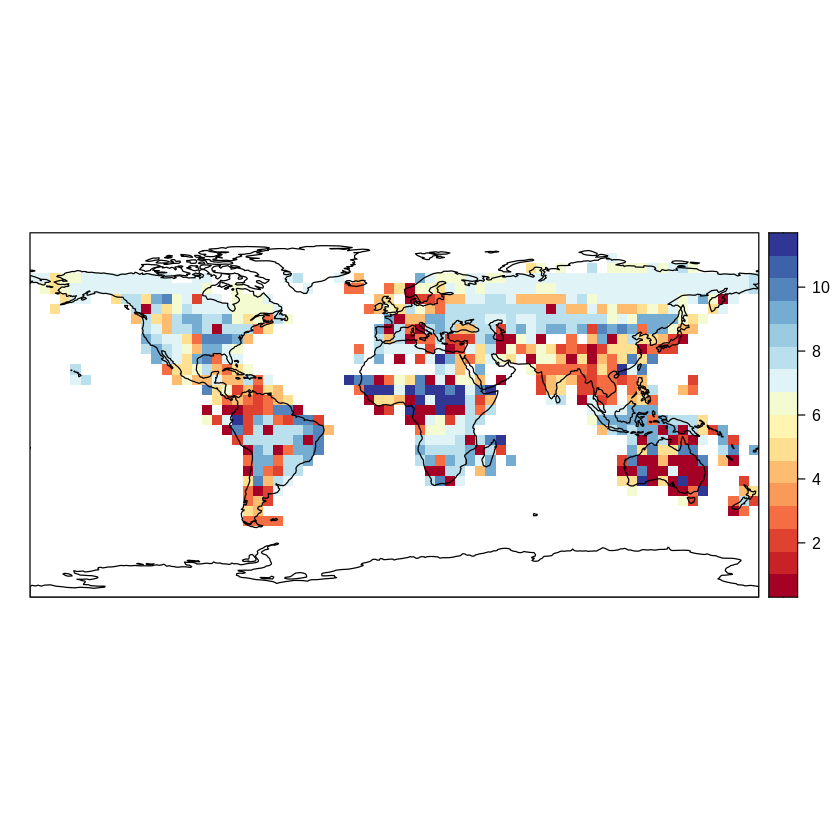

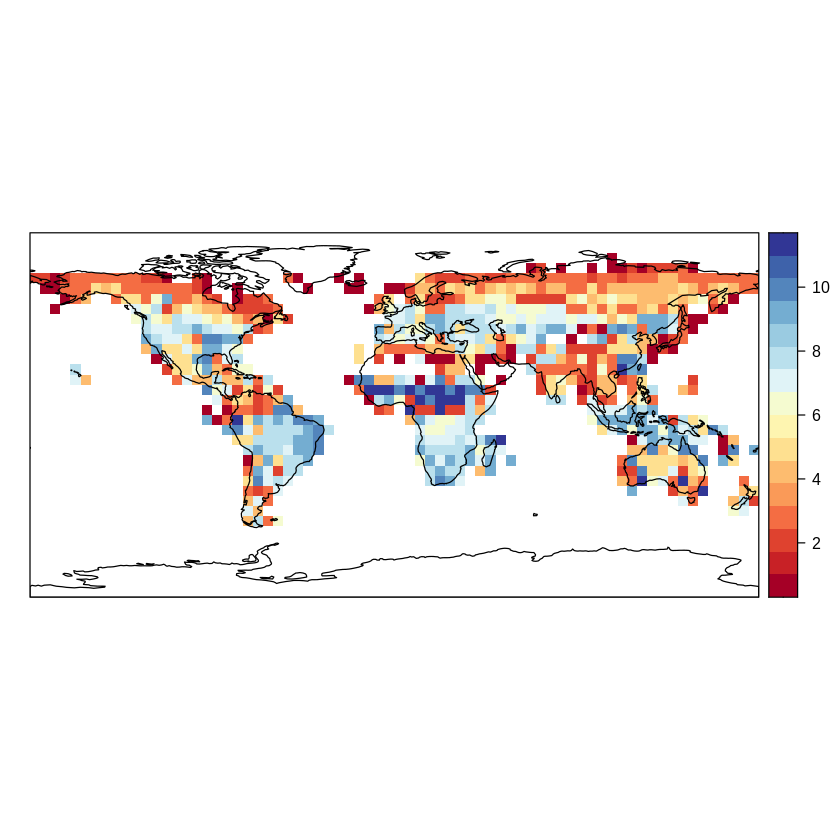

In [23]:
main_fire_season_start_clim <- quantity2clim(quantity = df$main_fire_season_start, what = 'main fs starts', ref.grid = ref.grid, backperm = NULL)
spatialPlot(main_fire_season_start_clim, backdrop.theme = 'coastline')
main_fire_season_end_clim <- quantity2clim(quantity = df$main_fire_season_end, what = 'main fs starts', ref.grid = ref.grid, backperm = NULL)
spatialPlot(main_fire_season_end_clim, backdrop.theme = 'coastline')

fireSeassonLength_clim <- quantity2clim(quantity = df$fireSeassonLength, what = 'main fs starts', ref.grid = ref.grid, backperm = NULL)
spatialPlot(fireSeassonLength_clim, backdrop.theme = 'coastline')

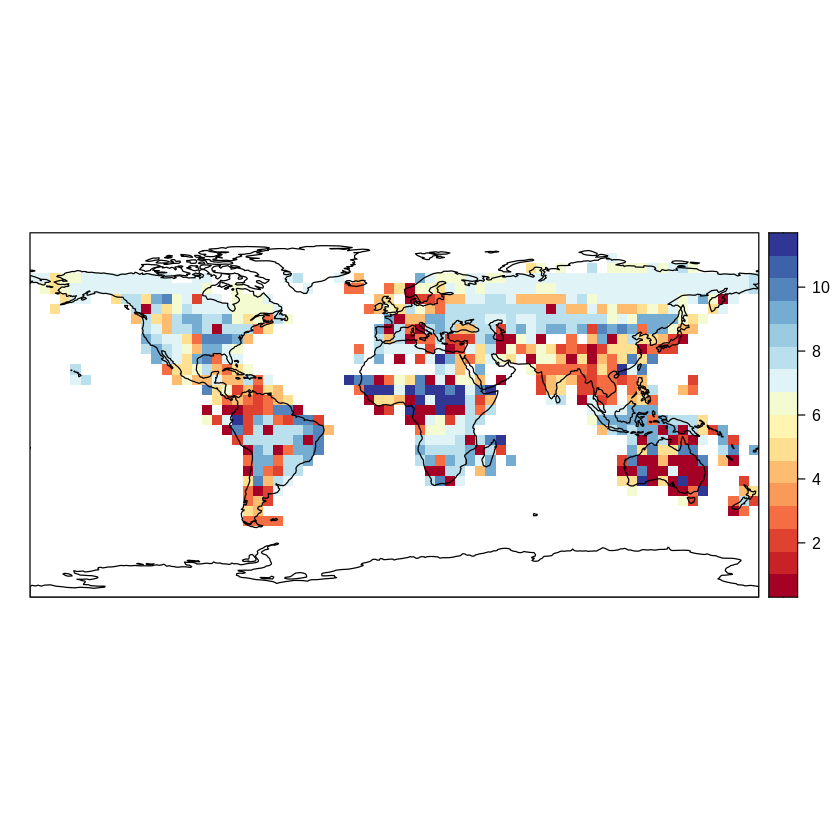

In [50]:
as.list

function (x, ...) 
UseMethod("as.list")
<bytecode: 0x55a08178c5e8>
<environment: namespace:base>